# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных
total_images — число фотографий квартиры в объявлении <br/>
last_price — цена на момент снятия с публикации<br/>
total_area — площадь квартиры в квадратных метрах (м²)<br/>
first_day_exposition — дата публикации<br/>
rooms — число комнат<br/>
ceiling_height — высота потолков (м)<br/>
floors_total - всего этажей в доме <br/>
living_area — жилая площадь в квадратных метрах (м²)<br/>
floor — этаж<br/>
is_apartment — апартаменты (булев тип)<br/>
studio — квартира-студия (булев тип)<br/>
open_plan — свободная планировка (булев тип)<br/>
kitchen_area — площадь кухни в квадратных метрах (м²)<br/>
balcony — число балконов <br/>
locality_name — название населённого пункта<br/>
airports_nearest — расстояние до ближайшего аэропорта в метрах (м) <br/>
cityCenters_nearest — расстояние до центра города (м)<br/>
parks_around3000 — число парков в радиусе 3 км<br/>
parks_nearest — расстояние до ближайшего парка (м)<br/>
ponds_around3000 - число водоемов в радиусе 3 км<br/>
ponds_nearest — расстояние до ближайшего водоёма (м)<br/>
days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br/>

# Предмет исследования
- зависимость следующих параметров: площадь, цена, число комнат, высота потолков
- время продажи квартиры, определить что продажи идут быстро/медленно
- зависит ли цена от площади, числа комнат и удаленности от центра
- зависит ли цена от того на каком этаже размещена квартира
- зависит ли цена от даты размещения объявления
- изучить среднюю стоимость квадратного метра в 10 населенных пунктах с самым большим количеством объявлений
- определить центр города и определить зависимость цены от удаления от центра 
- определить факторы влияющие на стоимость квартиры в центре (площадь, число комнат, высота потолков, этажность, удаленность от центра, дата размещения объявления), имеются ли различия с общей картиной

## Шаг 1: Открываем данные и изучаем общую информацию

### Загружаем необходимые библиотеки и открываем файл

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from collections import Counter

try:
    df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    print('Ошибка при загрузке данных')

data=df.copy() #делаем копию первоначальной таблицы, для контроля при изменении данных в df
m=Mystem()

### Изучаем общую информацию

In [4]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info() #смотрим распределение типов данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
data.describe().T #смотрим список характерных значений

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [7]:
data['rooms'].value_counts() #проверяем количество значений комнат = 0

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [8]:
data['is_apartment'].value_counts() #считаем количество уникальных значений по аппартаментам

False    2725
True       50
Name: is_apartment, dtype: int64

### Вывод

- имеются пропуски в данных в столбцах ceiling_height (высота потолков), floors_total (этажность), living_area (жилая площадь), is_apartment (аппартаменты), kitchen_area (площадь кухни), balcony (наличие балкона), locality_name (населенный пункт), airports_nearest (расстояние до аэропорта), cityCenters_nearest (расстояние до центра), parks_around3000 (число парков в радиусе 3км), parks_nearest (расстояние до ближайшего парка), ponds_around3000 (водоемы в радиусе 3 км), ponds_nearest (расстояние до ближайшего водоема), days_exposition (сколько дней было размещено объявление)
- в столбце is_apartment перемешаны различные типы данных, необходимо превести их к одному формату
- минимальная цена указана в 12190 рублей, возможны ошибки в данных, необходимо проверить на достоверность
- имеется 197 объектов с количеством комнат 0, необходимо проверить на достоверность
- минимальная высота потолков указана в 1 метр, а максимальная 100м - явная ошибка в данных
- минимальная площадь кухни 1,3м, скорей всего ошибка в данных
- минимальное расстояние до аэропорта 0м, явная ошибка в данных
- мимнимальное время размещения объявления 1 день, максимальное больше 4 лет, необходимо проверить распределение данных на выбросы
- в графе аппартаменты очень много пропусков, заполнено менее 12% строк, а положительное значение имеют менее 2% из заполненных, из-за малого количества информации по данному параметру будем исключать его влияняние на нашу выборку

## Предобработка данных

### Избавляемся от пропусков и некорретных значений

#### Высота потолков

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

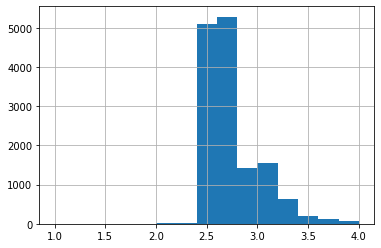

In [9]:
print(df['ceiling_height'].unique())
df['ceiling_height'].hist(bins=15, range = (1, 4))

После анализа данных по высоте потолков, выявляем выбросы данных в диапазонах <2,5 и >3,2м. <br/>
Высота потолков в жилых домах различной планировки и года постройки колеблиться от 2,48 ('хрущевки') до 3,2 ('сталинки')
Однако в домах дореволюционной постройки в Санкт-Петербурге встречаются потолки высотой до 4,5м
Таким образом сократим нашу выборку до диапазона >2,48 и <4,5м
Таким образом отнесем к некорректным данным следующие величины по высотам:<br/>
nan, 25, 5.2, 2.0, 5.3, 5.0, 32.0, 8.0, 27.0, 26.0, 24.0, 8.3, 14.0, 20.0, 6.0, 22.6, 5.8, 27.5, 10.3, 1.0, 100 <br/>
- явно в данных >20.0 ошибка при внесении высоты, сдвиг на один порядок
- в иных случаях нет возможности выявить причину возникновения ошибки либо выброса данных,<br/>
в связи с тем что данное количество значений в выборке невелико<br/>
приведем их к медианному значению 

In [10]:
height_median=df['ceiling_height'].median()

df['ceiling_height']=df['ceiling_height'].fillna(height_median) #убираем пропуски

for i in df['ceiling_height']:
    if i<2.48 or (i>4.5 and i<=20) or i==100:                              #заменяем выбросы на медиану
        df['ceiling_height'].replace(i, height_median, inplace=True)
    elif i>20 and i<100:                                                  #исправляем ошибки вноса данных
        df['ceiling_height'].replace(i, i/10, inplace=True)       

#### Этажность дома

In [11]:
print(df['floors_total'].unique())
df['floors_total'].value_counts()

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]


5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

Имеется 86 пропусков в данных. В связи с тем что кол-во их не превышает 0,3% от общей выборки, приведем их к медианному значению.<br/>
Согласно <code>[Википедии](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B9_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0)</code> в Санк-Петербурге отсутстуют здания со следуюшей этажностью:<br/>
36, 35, 34, 33, 60, 52<br/>
Таких значений всего 31, что не повлияет на выборку.<br/>
Так как все "нереальные" значения описывают высотные дома, приведем их к условному значению в 35 этажей.

In [12]:
floors_total_median=df['floors_total'].median()
df['floors_total']=df['floors_total'].fillna(floors_total_median) #убираем пропуски

for i in df['floors_total']:
    if i>35 and i !=37:                                           #заменяем выбросы на значение 35
        df['floors_total'].replace(i, 35, inplace=True)
print(df['floors_total'].unique())

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. 20. 28. 35. 21. 34.  1. 29. 33. 37.]


#### Жилая площадь

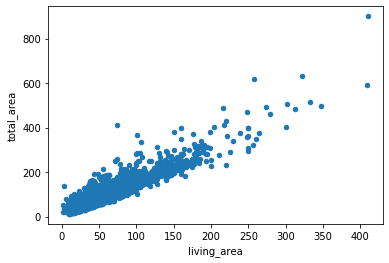

In [13]:
df.plot(x='living_area', y='total_area', kind='scatter')

- в данных о жилой площади много пропущенных значений, около 9%
- однако в данных об общей площади пропусков нет, заменим пропущенные данные на соотношение медианной жилой площади  (30м) к медианной общей (52м)
- берем медианный данные, а не средние - по причине высокого стандартного отклонения в данных показателях
- в данных имеются значения с очень маленькими жилыми площадями, минимальная общая площадь составляет 12 м, заменим все данные с жилой площадью менее 12м на их общую площадь

In [14]:
living_total_median=df['living_area'].median()/df['total_area'].median()
df['living_area']=df['living_area'].fillna(living_total_median*df['total_area']) #заменяем пропуски на коэффициент
df.loc[df['living_area']<12, 'living_area'] = df['total_area']  #меняем все значения с жилой площадью <12 на общую площадь

#### Аппартаменты

In [15]:
print(df['is_apartment'].unique())
print()
print(df['is_apartment'].value_counts())
print()
print(df['studio'].value_counts())
print()
df['open_plan'].value_counts()

[nan False True]

False    2725
True       50
Name: is_apartment, dtype: int64

False    23550
True       149
Name: studio, dtype: int64



False    23632
True        67
Name: open_plan, dtype: int64

- заполненных данных по аппартаментам очень мало, чуть более 9%
- однако столбцы "студия" и "открытая планировка" не имеют пропусков
- при анализе данных выяснилось, что и студий и квартир с открытой планировкой в базе достаточно мало (менее 1% от всей выборки)
- таким образом можем предположить, что все пропущенные данные в столбце 'аппартаменты' являются обычными квартирами
- cледовательно заполним пропуски в данном столбце на переменную False

In [16]:
df['is_apartment']=df['is_apartment'].fillna(False) #запоняем пропуски, и меняем тип переменной на bool

#### Площадь кухни

,total_area
kitchen_area,
1.30,28.500000
2.00,23.712857
2.30,34.700000
2.40,18.400000
2.89,66.400000
3.00,23.827143
3.20,43.000000
3.30,45.000000
3.40,44.400000


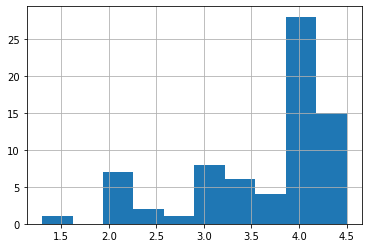

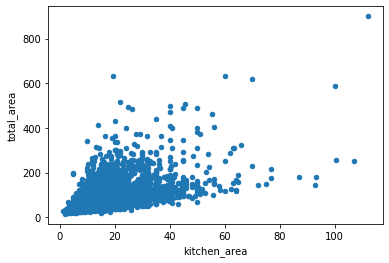

In [17]:
df['kitchen_area'].hist(bins=10, range=(1.3, 4.5))
df.plot(x='kitchen_area', y='total_area', kind='scatter')
kitchen_pivot=df.pivot_table(index=['kitchen_area'], values = 'total_area') #смотрим зависимость площади кухни от общей площади
kitchen_pivot.head(10)

- в столбце 'площадь кухни' отсутствует 10% данных
- заполним их соотношением общей площади к медианной доли площади кухни в квартире
- из анализа данных мы видим, что распределение маленьких кухонь, в большинстве своем не зависит от площади помещения
- минимальная площадь кухонь в 'хрущевках' 4.5м, проанализаруем кол-во квартир с площадью кухни меньше этого значения
- если данным количеством можно принебречь - приведем площади маленьких кухонь к 4,5м

In [18]:
kitchen_total_median=df['kitchen_area'].median()/df['total_area'].median()
df['kitchen_area']=df['kitchen_area'].fillna(kitchen_total_median*df['total_area']) #заменяем пропуски на коэффициент

# ищем долю маленьких кухонь
kitchen_little = 0
for i in df['kitchen_area']:
    if i<4.5:
        kitchen_little +=1
print('Количеcтво квартир с кухнями <4,5м.кв. -', kitchen_little, 'объектов недвижимости -',
      "{0:.2f}% от общей выборки".format(kitchen_little/len(df['kitchen_area'])*100))

Количеcтво квартир с кухнями <4,5м.кв. - 267 объектов недвижимости - 1.13% от общей выборки


In [19]:
#меняем все значения кухонь <4,5м.кв. 
df.loc[df['kitchen_area']<4.5, 'kitchen_area'] = 4.5  

#### Наличие балкона

Коэффициент корреляции Пирсона:


0.16877298407082728

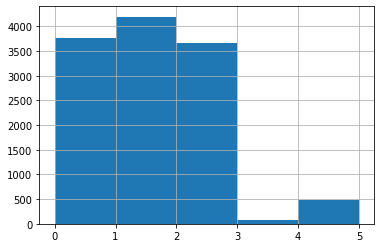

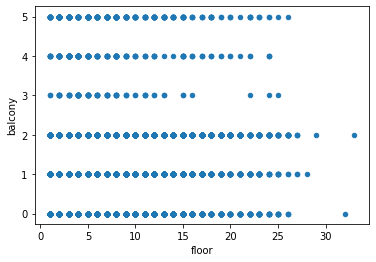

In [20]:
df['balcony'].hist(bins=5)
df.plot(x='floor', y='balcony', kind='scatter')
print('Коэффициент корреляции Пирсона:')
df['floor'].corr(df['balcony'])

- как видно из графиков и коэффициента корреляции, наличие балкона не зависит от того на каком этаже находится квартира
- таким образом мы можем предположить, что отсутствующие данные о наличии балконов, могут означть его физическое отсутствие
- заполним отсутствующие данные 0

In [21]:
df['balcony']=df['balcony'].fillna(0) #заполняем пропуски 0

#### Населенный пункт

In [22]:
Counter(df['locality_name'])

Counter({'Санкт-Петербург': 15721,
         'посёлок Шушары': 440,
         'городской посёлок Янино-1': 61,
         'посёлок Парголово': 327,
         'посёлок Мурино': 522,
         'Ломоносов': 133,
         'Сертолово': 142,
         'Петергоф': 201,
         'Пушкин': 369,
         'деревня Кудрово': 299,
         'Коммунар': 89,
         'Колпино': 338,
         'поселок городского типа Красный Бор': 5,
         'Гатчина': 307,
         'поселок Мурино': 34,
         'деревня Фёдоровское': 8,
         'Выборг': 237,
         'Кронштадт': 96,
         'Кировск': 84,
         'деревня Новое Девяткино': 144,
         'посёлок Металлострой': 66,
         'посёлок городского типа Лебяжье': 11,
         'посёлок городского типа Сиверский': 29,
         'поселок Молодцово': 9,
         'поселок городского типа Кузьмоловский': 13,
         'садовое товарищество Новая Ропша': 1,
         'Павловск': 38,
         'деревня Пикколово': 1,
         'Всеволожск': 398,
         'Волхов': 111,


- в данных о местонахождении объекта имеются пропуски в данных
- их количество ничтожно, поэтому заменим их на "Прочее"
- в имеющихся данных по местоположению могут находиться неявные дубликаты
- проведем леммитизацию данных и избавимся от них

In [23]:
df['locality_name']=df['locality_name'].fillna('Прочее') #заменим пропуски                        

locality_lem=[]
for i in df['locality_name'].unique():
    lemma = m.lemmatize(i)
    locality_lem.append(lemma)
locality_lem

[['санкт-петербург', '\n'],
 ['поселок', ' ', 'шушар', '\n'],
 ['городской', ' ', 'поселок', ' ', 'янино', '-', '1', '\n'],
 ['поселок', ' ', 'парголовый', '\n'],
 ['поселок', ' ', 'муриный', '\n'],
 ['ломоносов', '\n'],
 ['сертолово', '\n'],
 ['петергоф', '\n'],
 ['пушкин', '\n'],
 ['деревня', ' ', 'кудрово', '\n'],
 ['коммунар', '\n'],
 ['колпино', '\n'],
 ['поселок', ' ', 'городской', ' ', 'тип', ' ', 'красный', ' ', 'бор', '\n'],
 ['гатчина', '\n'],
 ['поселок', ' ', 'муриный', '\n'],
 ['деревня', ' ', 'федоровский', '\n'],
 ['выборг', '\n'],
 ['кронштадт', '\n'],
 ['кировск', '\n'],
 ['деревня', ' ', 'новый', ' ', 'девяткино', '\n'],
 ['поселок', ' ', 'металлострой', '\n'],
 ['поселок', ' ', 'городской', ' ', 'тип', ' ', 'лебяжий', '\n'],
 ['поселок', ' ', 'городской', ' ', 'тип', ' ', 'сиверский', '\n'],
 ['поселок', ' ', 'молодцово', '\n'],
 ['поселок', ' ', 'городской', ' ', 'тип', ' ', 'кузьмоловский', '\n'],
 ['садовый', ' ', 'товарищество', ' ', 'новый', ' ', 'ропша', '\n'],

Выявленны неявные дубликаты Мурино, Кудрово, Коммунар, Бугры, Тельмана, Мга, им.Свердлова, Щеглово, Кузьмоловский, Гарболово, Вырица, Лебяжье, Аннино, Советский, Павлово, Федоровское, Любань, Калитино, Янино, Мичуринское, Ильичёво, Саперное, Красный Бор, Стеклянный, Лесогорский, Громово, Перово, Терловово, Рябово, Рабитицы, Старая Малукса, Приветинское, Возрождение, Петровское, Мельниково, Назия, Жилгородок, Зеленый Бор, Лисий Нос, Лесное, Гаврилово, Никольское, Сумино, Вещево, Приветнинское, Большая Ижора, Коробицыно, Зимитицы, Усть-Луга.   
Основная причина их появления различное написание слова "поселок" и сочетания "поселок городского типа".
Исправим такие дубликаты.        

In [24]:
# удалим все параметры кроме названия населенных пунктов
df['locality_name'] = df['locality_name'].str.replace('поселок', '')
df['locality_name'] = df['locality_name'].str.replace('посёлок', '')
df['locality_name'] = df['locality_name'].str.replace('городской', '')
df['locality_name'] = df['locality_name'].str.replace('городского', '')
df['locality_name'] = df['locality_name'].str.replace('типа', '')
df['locality_name'] = df['locality_name'].str.replace('деревня', '')
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество ', '')
df['locality_name'] = df['locality_name'].str.replace('село', '')
df['locality_name'] = df['locality_name'].str.replace('станции', '')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество', '')
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный', '')

#убираем лишние пробелы
df['locality_name'] = df['locality_name'].str.replace(' ', '')

Counter(df['locality_name'])


Counter({'Санкт-Петербург': 15721,
         'Шушары': 440,
         'Янино-1': 68,
         'Парголово': 327,
         'Мурино': 590,
         'Ломоносов': 133,
         'Сертолово': 142,
         'Петергоф': 201,
         'Пушкин': 369,
         'Кудрово': 472,
         'Коммунар': 89,
         'Колпино': 338,
         'КрасныйБор': 8,
         'Гатчина': 307,
         'Фёдоровское': 15,
         'Выборг': 237,
         'Кронштадт': 96,
         'Кировск': 84,
         'НовоеДевяткино': 144,
         'Металлострой': 66,
         'Лебяжье': 15,
         'Сиверский': 29,
         'Молодцово': 9,
         'Кузьмоловский': 35,
         'НоваяРопша': 1,
         'Павловск': 38,
         'Пикколово': 1,
         'Всеволожск': 398,
         'Волхов': 111,
         'Кингисепп': 104,
         'Приозерск': 66,
         'Сестрорецк': 183,
         'Куттузи': 7,
         'Аннино': 16,
         'Ефимовский': 3,
         'Плодовое': 5,
         'Заклинье': 3,
         'Торковичи': 3,
         'Перв

Количество населенных пунктов после обработки уменьшилось  
Так же произошли значительные изменения в качестве данных.  
Так Кудрово, например, поднялось с 10 места на 3 по количеству размещенных объявлений (472 против 299 ранее).

#### Расстояние до аэропорта

In [25]:
# группируем данные о расстоянии до аэропрорта по географическому признаку
df.groupby('locality_name')['airports_nearest'].mean()

locality_name
Агалатово              NaN
Александровская    12896.5
Алексеевка             NaN
Аннино                 NaN
Аро                    NaN
                    ...   
Яльгелево              NaN
Ям-Тесово              NaN
Янино-1                NaN
имениМорозова          NaN
имениСвердлова         NaN
Name: airports_nearest, Length: 306, dtype: float64

- из полученных данных видно что целые поселки не имеют данных о расстоянии до аэропорта
- здесь явно не достает картографических данных
- для нашего анализа данные значения пока не актуальны, поэтому заменим для удобства анализа все пропуски 0

In [26]:
df['airports_nearest']=df['airports_nearest'].fillna(0)

#### Расстояние до центра, число парков и водоемов и расстояние до них

- здесь мы видим аналогичную проблему с недостатком картографических данных, как и в случае с расстоянием до аэропорта
- поступим аналогично, для простоты анализа заменим пропуски 0

In [27]:
df['cityCenters_nearest']=df['cityCenters_nearest'].fillna(0)
df['parks_around3000']=df['parks_around3000'].fillna(0)
df['parks_nearest']=df['parks_nearest'].fillna(0)
df['ponds_around3000']=df['ponds_around3000'].fillna(0)
df['ponds_nearest']=df['ponds_nearest'].fillna(0)

#### Cколько дней было размещено объявление

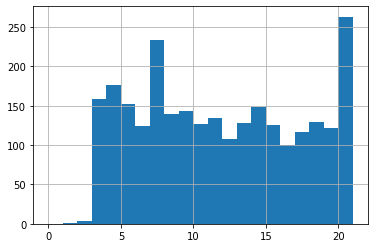

In [28]:
df['days_exposition'].hist(bins=21, range=(0, 21))

- в данных имеются низкие значения в столбце 'кол-во дней размещения'
- возьмем за стандртное время размещения объявления 3 недели
- сверх низких значений (менее 3 дней) практически нет, возможно это ошибка в данных, а возможно выброс
- так же имеется порядка 2% данных со сроком размещения менее недели
- в данном случае кол-во ничтожно, поэтому оставим без изменений
- имеется так же порядка 14% пропусков значений в данных, заменим их на медианое значение

In [29]:
df['days_exposition']=df['days_exposition'].fillna(df['days_exposition'].median())

#### Количество-комнат

In [30]:
# проверим вхождение квартир без комнаты в наши группы
apartment_zero=df.pivot_table(index='rooms', values='is_apartment', aggfunc='sum')
studio_zero=df.pivot_table(index='rooms', values='studio', aggfunc='sum')
open_zero=df.pivot_table(index='rooms', values='open_plan', aggfunc='sum')

Из предыдущего анализа данных мы выяснили, что квартир с количеством комнат 0 составляет 197шт.  
После проверки, мы видим, что это не совсем ошибочные значение, так как все данные квартиры относятся либо к студиям либо к квартирам со свободной планировкой.  
Так как доля таких квартир в общей выборке не велика, а доля 1-комнатных составляет почти 35%, то для удобства анализа изменим значение 0 на 1 комнату.

In [31]:
df.loc[df['rooms']==0, 'rooms'] = 1 

#### Низкая цена

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12592,15,850000.0,52.0,2018-02-09T00:00:00,3,2.65,4.0,30.000000,2,False,...,5.800,0.0,Пикалёво,0.0,0.0,0.0,0.0,0.0,0.0,46.0
12999,6,850000.0,31.0,2019-01-29T00:00:00,1,2.65,5.0,17.884615,1,False,...,5.425,0.0,Подпорожье,0.0,0.0,0.0,0.0,0.0,0.0,95.0
19395,20,700000.0,41.0,2018-10-26T00:00:00,1,2.65,5.0,16.000000,5,False,...,9.000,0.0,Сланцы,0.0,0.0,0.0,0.0,0.0,0.0,26.0
6859,6,490000.0,40.0,2017-12-11T00:00:00,1,2.65,5.0,23.076923,3,False,...,7.000,0.0,Старополье,0.0,0.0,0.0,0.0,0.0,0.0,43.0
12756,10,950000.0,57.0,2018-06-11T00:00:00,3,2.70,2.0,38.000000,2,False,...,6.000,1.0,Сланцы,0.0,0.0,0.0,0.0,0.0,0.0,133.0


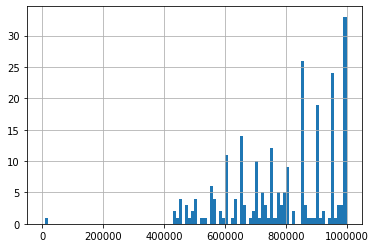

In [32]:
df['last_price'].hist(bins=100, range=(0, 1000000))
df['last_price'].sort_values()  #определяем индекс строки с минимальной ценой
df.iloc[8793] #смотрим данные на квартиру по индексу
df.query('total_area == 109').sample(5) #смотрим цены на квартиры с площадью 109м.кв.
df.query('last_price < 1000000').sample(5) #смотрим данные по квартирам дешевле 1000000

- имеется одно ошибочное значение в данных о цене
- после анализа данных определяем, что ошибка составляет 3 порядка, исправим данный выброс
- квартиры дешевле 1 000 000руб., расположены в области, и скорее всего имеют корректное обозначение цены.

In [33]:
df.loc[df['last_price']==12190, 'last_price'] = 12190000

### Замена типа данных

In [34]:
df['total_images']=df['total_images'].astype('int8')
df['last_price']=df['last_price'].astype('int32')
df['total_area']=round(df['total_area'].astype('int16')) #округляем до целых значений
df['rooms']=df['rooms'].astype('int8')
df['floors_total']=df['floors_total'].astype('int8')
df['living_area']=round(df['living_area'].astype('int16')) #округляем до целых значений
df['floor']=df['floor'].astype('int8')
df['balcony']=df['balcony'].astype('int8')
df['airports_nearest']=df['airports_nearest'].astype('int32')
df['cityCenters_nearest']=df['cityCenters_nearest'].astype('int32')
df['parks_around3000']=df['parks_around3000'].astype('int8')
df['parks_nearest']=df['parks_nearest'].astype('int32')
df['ponds_around3000']=df['ponds_around3000'].astype('int8')
df['ponds_nearest']=df['ponds_nearest'].astype('int32')
df['days_exposition']=df['days_exposition'].astype('int16')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7239,10,9990000,90,2016-06-13,3,3.10,6,76,6,False,...,43.4,3,Санкт-Петербург,33358,13171,0,0,2,118,630
20068,11,6990000,80,2019-02-19,3,2.65,5,49,4,False,...,11.0,4,Санкт-Петербург,47362,25925,1,169,1,404,95
5474,8,1370000,31,2017-10-19,1,2.65,4,17,1,False,...,7.0,0,Тосно,0,0,0,0,0,0,48
22223,8,6750000,54,2018-07-23,2,2.70,18,28,14,False,...,11.7,5,Санкт-Петербург,45929,18654,0,0,0,0,70
12366,11,6800000,53,2016-12-07,2,3.30,7,34,5,False,...,8.0,1,Санкт-Петербург,10574,9556,1,194,0,0,493


### Общий вывод по подготовке данных

- После проведения обработки и замены типов данных, удалось снизить затраты памяти с 3,7 до 1,5mb.   
- При росте объема данных экономия ресурсов на 60% может иметь большое значение.  
- Кроме того данные приняли вид более удобный для визуального анализа.
- Убрали выбросы в высоте потолков. Объеденили их в диапазоне 2,48-4,5м. Такие значения были выбраны в соответствии со сложишимися исторически высотами потолков в Санкт-Петербурге
- убрали этажность домов, которая отстутствует в городе. Несмотря на это, выбросы были в сторону высотных домов. Таким образом объеденили данныен выбросы для условной высоты в 35 этажей.
- в столбце "жилая площадь" много пропусков данных. Убрали их заменив на отношений общей площади квартиры к медианному отношению общей площади к жилой по всей выборке
- так же отсекли нижний порог по жилым площадям менее 12м.кв. (площадь выбрана на основнаии наличия в реальной продаже в Санкт-Петербурге квартиры такой площади)
- доля аппартаментов очень мала, поэтому несмотря на большое количество пропущенных данных будем считать данные объекты обычными квартирами
- по площадям кухонь так же наблюдается относительно большой пропуск в данных (10%), заменим их по аналогии с квартирами с отсутствующей жилой площадью. За минимальную площадь кухни примем 4,5м.кв.(минимальная кухня в 'хрущевке')
- наличие балкона не коррелируется с иными данными, поэтому все пропуски будим считать - отсутствием балкона в квартире.
- при обработке данных по населенным пунктам, было выявлено большое количество неявных дубликатов, связанных с различным вводом данных в таблице, привели ее к общему виду
- в результате обработки данных дубликатов, так же изменились данные, стали более соответствовать их фактическому значению. Так например, Кудрово, поднялось в результате корректировки данных с 10 места на 3 по количеству размещенных объявлений (472 против 299 ранее).
- имеется множество пропусков в данных о расстоянии до аэропорта, центра, о наличии и расстоянии до парков и водоемов
- это явный пропуск в картографических данных, с учетом того что актуализировать данные у нас на данный момент нет возможности, для удобство анализа заменим пропуски 0
- количество размещений объявлений менее 1 недели незначительно, поэтому оставляем их как есть
- пропуски в данных о времени размещения объявлений заменим на медиану, медиана составляет 95 дней, что чуть больше 3 месяцев - нормальное время размещения объявления о продаже недвижимости
- все квартиры с количеством комнат 0 являются либо студиями либо квартирами с свободной планировкой
- нельзя отнести данный момент к некорректной обработке данных, однако в связи с тем что данных квартир незначительное количество, изменим количество комнат на 1 для удобства проведения последующего анализа
- имеется один выброс близкий к 0 в столбце "цена". После анализа определили, что ошибка в данных на 3 порядка, исправили значение
- квартиры дешевле 1 000 000 находятся в области, так что низкая цена допустима

## Расчёты и добавление результатов в таблицу

### Расчеты

#### Цена квадратного метра

In [35]:
df['price_kvm']=df['last_price']/df['total_area']
df['price_kvm']=df['price_kvm'].astype('int32')
print('Минимальная цена кв.м.', df['price_kvm'].min())
print('Максимальная цена кв.м.', df['price_kvm'].max())
print('Средняя стоимость кв.м.', round(df['price_kvm'].mean()))
print('Медианная стоимость кв.м.', round(df['price_kvm'].median()))

Минимальная цена кв.м. 7962
Максимальная цена кв.м. 1907500
Средняя стоимость кв.м. 99878
Медианная стоимость кв.м. 95454


#### Дата снятия объявления с публикации

In [36]:
exp_off = df['days_exposition'].apply(lambda x: pd.Timedelta(x, unit='D'))
df['last_day_exposition'] = df['first_day_exposition'] + exp_off

print('Самое раннее снятое объявление', df['last_day_exposition'].min())
print('Самое позднее снятое объявление', df['last_day_exposition'].max())

Самое раннее снятое объявление 2015-03-02 00:00:00
Самое позднее снятое объявление 2019-08-06 00:00:00


#### День недели, месяц и год подачи объявления

In [37]:
df['first_weekday']=df['first_day_exposition'].dt.weekday
df['first_month']=df['first_day_exposition'].dt.month
df['first_year']=df['first_day_exposition'].dt.year
print ('Чаще всего размещали объявления по дням недели (0-пн, 6-вс) в %:')
print(round(df['first_weekday'].value_counts(normalize=True)*100))
print('')
print ('Чаще всего размещали объявления в следующие месяцы (1-янв, 12-дек) в %:')
print(round(df['first_month'].value_counts(normalize=True)*100))
print('')
print ('Чаще всего размещали объявления в следующие годы в %:')
print(round(df['first_year'].value_counts(normalize=True)*100))

Чаще всего размещали объявления по дням недели (0-пн, 6-вс) в %:
3    18.0
1    18.0
4    17.0
2    17.0
0    15.0
5     8.0
6     7.0
Name: first_weekday, dtype: float64

Чаще всего размещали объявления в следующие месяцы (1-янв, 12-дек) в %:
2     11.0
3     11.0
4     10.0
11    10.0
10     9.0
9      8.0
6      7.0
8      7.0
7      7.0
12     7.0
1      6.0
5      5.0
Name: first_month, dtype: float64

Чаще всего размещали объявления в следующие годы в %:
2018    36.0
2017    35.0
2019    12.0
2016    12.0
2015     5.0
2014     1.0
Name: first_year, dtype: float64


#### Этаж квартиры (первый, последний, другой)

In [38]:
def n_floor(i):
        if i['floor'] == 1:
            return 'первый'
        if i['floor'] == i['floors_total']:
            return 'последний'
        return 'другой'
               
df['id_floor'] = df.apply(n_floor, axis = 1)  

print('На каком этаже расположена квартира:')
df['id_floor'].value_counts()

На каком этаже расположена квартира:


другой       17441
последний     3341
первый        2917
Name: id_floor, dtype: int64

#### Соотношение жилой и общей площади

In [39]:
df['k_area'] = round(df['living_area']/df['total_area'], 2)
print('Минимальное соотношение жилой и общей площади', df['k_area'].min())
print('Максимальное соотношение жилой и общей площади', df['k_area'].max())
print('Среднее соотношение жилой и общей площади', round(df['k_area'].mean(), 2))
print('Медианное соотношение жилой и общей площади', round(df['k_area'].median(),2))

Минимальное соотношение жилой и общей площади 0.14
Максимальное соотношение жилой и общей площади 1.0
Среднее соотношение жилой и общей площади 0.57
Медианное соотношение жилой и общей площади 0.57


#### Отношение площади кухни к общей площади

In [40]:
df['k_kitchen'] = round(df['kitchen_area']/df['total_area'], 2)
print('Минимальное соотношение кухни и общей площади', df['k_kitchen'].min())
print('Максимальное соотношение кухни и общей площади', df['k_kitchen'].max())
print('Среднее соотношение кухни и общей площади', round(df['k_kitchen'].mean(), 2))
print('Медианное соотношение кухни и общей площади', round(df['k_kitchen'].median(),2))

Минимальное соотношение кухни и общей площади 0.03
Максимальное соотношение кухни и общей площади 0.79
Среднее соотношение кухни и общей площади 0.19
Медианное соотношение кухни и общей площади 0.18


### Выводы по расчетам

- разброс по стоимость жилья очень велик и зависит от множества факторов
- средняя цена метра и медианная практически совпадают и составляют 95-99 тыс.руб./м.кв.
- чаще всего объявления размещают в будние дни, на долю сб и вс приходится всего 15% всех объявлений
- больше всего объявлений приходится на февраль-апрель - 32%, а меньше всего на лето - 21%
- 71% объявлений приходится на 2017-2018 года
- на первый и последний этажи приходится 12 и 14 %% всех объявлений
- в соотношении жилой и общей площади просматривается большой разброс,  
причем максимальное значение в 1 является выбросом из-за наших допущений при обработке входящих данных
- при этом среднее и медианное соотношение площадей совпадает - 0,57
- соотношение площади кухни к общей площади квартиры, так же имеет очень широкий разброс
- при этом среднее и медианное значение очень близки 0,18-0,19

## Исследовательский анализ данных

#### Площадь, цена, число комнат и высота потолков

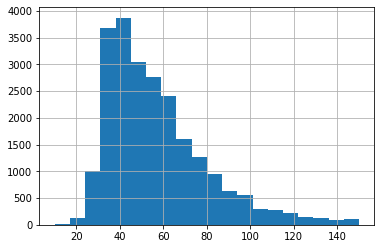

In [41]:
# общая площадь
df['total_area'].hist(bins=20, range=(10, 150))

- наибольшее предложение квартир с общей площадью 30-65 м.кв. (около 65%)
- но и доля "больших" квартир 70-100 достаточна велика (около 20%)
- доля квартир менее 30м.кв. мала и составляет около 5%
- предложение квартир свыше 100 кв.м. относительно не велико, но их доля равномерна распределена

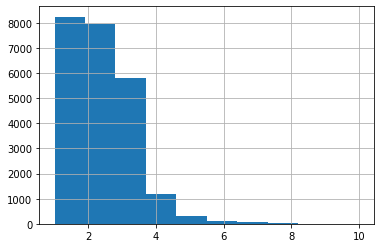

In [42]:
# количество комнат
df['rooms'].hist(bins=10, range=(1, 10))

- предложение 1 и 2-х комнатных квартир примерно одинаковое и составляет подавляющую долю объявлений - 68%
- число предложений квартир с 3 комнатами так же велико - около 25%
- предложение квартир с числом комнат больше 3 резко падает
- предложения с числом комнат 5+ практически отсутствуют

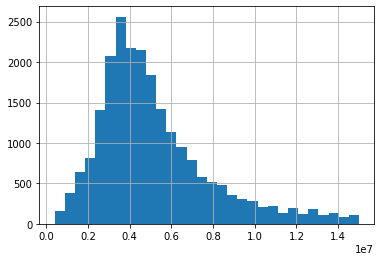

In [43]:
# цена
df['last_price'].hist(bins=30, range=(400000, 15000000))

- больше всего предлагается квартир в диапазоне 3-5 млн.руб. (около 47%)
- имеется значительная часть предложений (около 15%) с ценой менее 3 млн.руб., что можно связать с большим предложением квартир в области
- предложения свыше 5 млн руб, так же широко распределны, но их доля плавно уменьшается с ростом цены

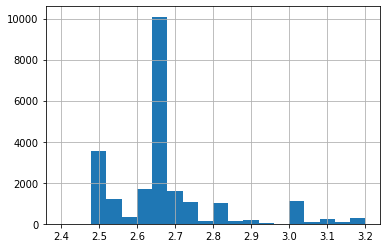

In [44]:
# высота потолков
df['ceiling_height'].hist(bins=20, range=(2.4, 3.2))

- наибольшее число предложений квартир с высотой потолка 2,65 (более 40%), что соответствует высоте в наиболее распространенных жилых домах
- выброс на уровне высоты потолка в 2,5м, можно связать с наличием в продаже большого количества "хрущевок" (около 17% от выборки)
- небольшой выброс в районе высоты в 3-3,2м, можно объяснить наличием относительно большого количества "сталинок" в выборке (около 8%)

#### Время продажи квартиры

Среднее время продажи квартиры 169 дней
Медианное время продажи квартиры 95 дней


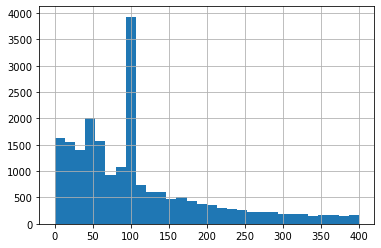

In [45]:
df['days_exposition'].hist(bins=30, range=(0, 400))
print('Среднее время продажи квартиры', round(df['days_exposition'].mean()), 'дней')
print('Медианное время продажи квартиры', round(df['days_exposition'].median()), 'дней')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26c7c3c2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26c7c2ffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26827e4c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26c7bc4750>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26c7bc4c50>],
 'means': []}

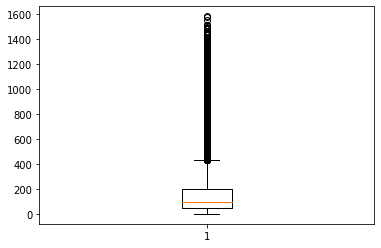

In [46]:
plt.boxplot(df['days_exposition']) #диаграмма размаха

- выброс данных в районе медианы ненужно полностью принимать в расчет, так как во время обработки данных мы заполняли отсутствующие данные медианой
- с учетом того что таких данных было значительное количество (14%), это привело к перекосу графика
- однако медианное значение без учета пропусков так же составляло 95 дней
- из этого можно сделать вывод, что половина объявлений закрывается за 3 месяца
- если исключить пропущенные данные по дате из выборки, то наибольший пик закрытия объявлений придется на период 50-60 дней
- доля закрытия объявлений менее чем за 10 дней то же велика и составляет более 6%
- нет понимания в чем причина короткого размещения объявления, необходим более глубокий анализ и наличие данных для поиска 3-го фактора
- можно говорить о том, что стандартное время размещения объявления составляет от 2 недель до 6 месяцев
- судя по межквартильному размаху, объявления снятые менее чем за 2 недели размещаются очень быстро, а объявления размещенные более 400 дней - очень долго

#### Редкие и выбивающиеся значения

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26c7bb0f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26c7bb6a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26c7bb0390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26c7bbc490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26c7bbc990>],
 'means': []}

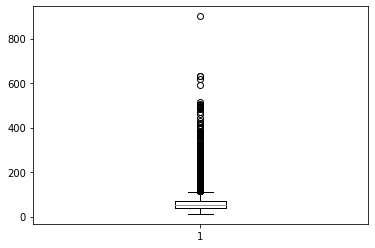

In [47]:
df.sort_values(by='total_area', ascending=False).head(10).T #смотрим топ-10 квартир по общей площадт
df.sort_values(by='total_area', ascending=True).head(10).T #смотрим 10 самых маленьких квартир
plt.boxplot(df['total_area'])

- среди топ-10 квартир по площади не просматривается явная зависимость от какого-либо параметра
- среди 10 самых маленьких квартир прослеживаются следующие моменты:   
квартира расположена в Санкт-Петербурге, в 5 этажном доме, в основном на 1 этажах, с очень маленькими кухнями 
- из этого можно сделать вывод, что данные квартиры являются либо комнатами в коммуналках либо перестроенными подсобными помещениями

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26c7b19d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26c7b1d7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26c7b19150>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26c7b26250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26c7b26750>],
 'means': []}

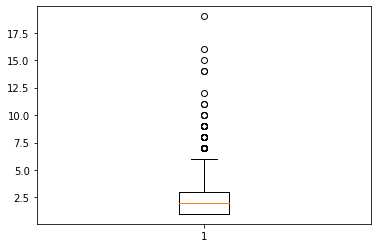

In [48]:
df.sort_values(by='rooms', ascending=False).head(10).T
plt.boxplot(df['rooms'])

- среди квартир с большим количеством комнат можно четко увидеть следующие общие параметры:   
квартира находится в Санкт-Петербурге, в 3-4 км от центра, несмотря на большое кол-во комнат, жилая площадь маленькая, т.е. комнаты по площади 10-15 м.кв., высокие потолки, дома в 4-6 этажей, при этом стоимость квадратного метра либо чуть выше, либо чуть ниже среднерыночной
- из этого можно сделать вывод, что в основном квартиры с большим количеством комнат представляют из себя расселенные коммунальные квартиры в старом жил.фонде

(0, 15000000)

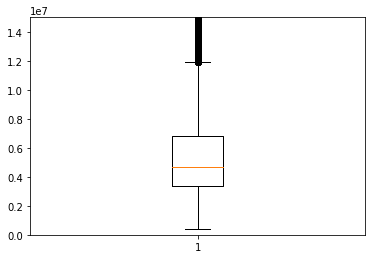

In [49]:
df.sort_values(by='last_price', ascending=False).head(10).T
df.sort_values(by='last_price', ascending=True).head(10).T
plt.boxplot(df['last_price'])
plt.ylim(0,15000000)

- среди топ-10 по стоимости выделяются квартиры с большой общей площадью находящиеся на последних этажах, при этом отношение жилой к общей площади ниже среднего по рынку
- из этого можно сделать вывод, что выбивающиеся значения по стоимости пренадлежат определенной нише недвижимости - в виде пентхаусов с террасами
- среди самых бюджетных вариантов, общий основноой признак один - нахождение квартиры в области

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26c7c50590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26c7c4a050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26c7c91a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26c7c4aa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26c7c4af90>],
 'means': []}

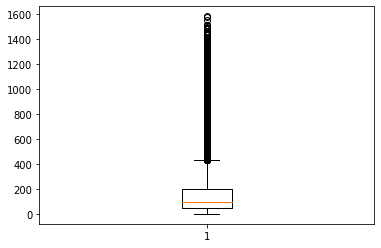

In [50]:
df.sort_values(by='days_exposition', ascending=False).head(10).T
df.sort_values(by='days_exposition', ascending=True).head(10).T
plt.boxplot(df['days_exposition'])

Показатели по первоначальным данным:
count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Выбросы:
95    3245
45     880
60     538
7      234
30     208
90     204
4      176
3      158
5      152
14     148
Name: days_exposition, dtype: int64
Показатели по отфильтрованым данным:
count    14359.000000
mean       130.621631
std         99.446673
min         14.000000
25%         50.000000
50%        103.000000
75%        188.000000
max        400.000000
Name: days_exposition, dtype: float64


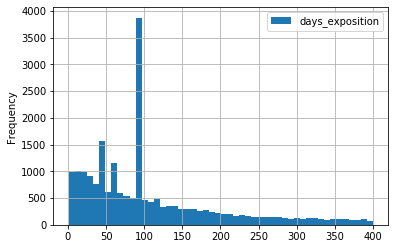

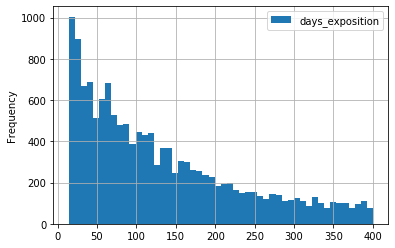

In [51]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1, 400)) #график с первоначальными данными
print('Показатели по первоначальным данным:')
print(df['days_exposition'].describe())
print('')
print('Выбросы:')
print(df['days_exposition'].value_counts().head(10))
       
#уберем выбросы >400, <14, 90, 95, 45, 60, 30
filter_day = df.query('days_exposition != 30 and days_exposition != 45'
                        'and days_exposition != 60 and days_exposition != 90'
                        'and days_exposition >= 14 and days_exposition <= 400'
                        'and days_exposition != 95')

filter_day.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (14, 400))
print ('Показатели по отфильтрованым данным:')
print(filter_day['days_exposition'].describe())

Убираем выбросы и значения вне рамок межквартильного размаха (как мы уже определили этот диапазон в 14-400 дней).    
Выбросы на 30, 45, 90 дней скорее всего связаны со спецификой размещения объявлений (автоматически снимаются с публикации в эти дни).  
Выброс в 95 дней, как отмечалось ранее, свяpан с нашей предобработкой данных.   
Ожидаемо, что в очищенных данных получаем большие значения медианы и меньшие значения среднего значения - 103 и 130 соответственно, вместо 95 и 169.  
В целом картина не изменилась - половина всех размещенных объявлений приходится на срок до 100 дней.

'% удаленных данных:'

61

Показатели по первоначальным данным:
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Выбросы:
45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64


Int64Index([], dtype='int64')

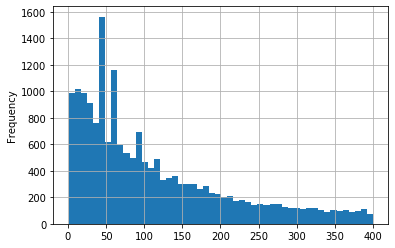

In [72]:
# % удаленных данных
display('% удаленных данных:', round(len(filter_day)/len(df)*100))

# в связи с большим количеством выпадающих данных, создадим новый df с первоначальными значениями days_exposition
# исключим из него только значения NaN (14% от всей выборки)

new_day = data ['days_exposition'].dropna()

new_day.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1, 400)) #график с первоначальными данными
print('Показатели по первоначальным данным:')
print(new_day.describe())
print('')
print('Выбросы:')
print(new_day.value_counts().head(10))

выбросы в 30, 45, 90 дней могут говорить нам о том, что в данные дни автоматически снимались объявления с публикации. 

#### Факторы больше всего влияющие на стоимость

##### Цена - общая площадь

In [ ]:
df['total_area'].hist(bins=30, range=(12, 150)) #распределение объявлений
plt.show

df.plot(x='total_area', y='price_kvm', kind='scatter', alpha = 0.3)
plt.show
print('Коэффициент корреляции Пирсона (площадь):')
print(df['total_area'].corr(df['price_kvm']))

filter_total = df.query('total_area <= 100 and last_price <=7000000')

filter_total.plot(x='total_area', y='price_kvm', kind='hexbin')
plt.show
print('Коэффициент корреляции Пирсона в выборке (площадь):')
print(filter_total['total_area'].corr(df['price_kvm']))

- с ростом площади квартиры стоимость квадратного метра слабо коррелируется  
- при чем если отсечь редкие и выбивающиеся значения (оставить выборку квартир с условием до 100м.кв. и до 7 000 000руб) мы видим обратную корреляцию - с ростом площади, стоимость квадрата снижается

##### Цена - число комнат

In [ ]:
df.plot(x='rooms', y='price_kvm', kind='scatter')
print('Коэффициент корреляции Пирсона (комнаты):')
print(df['rooms'].corr(df['price_kvm']))
print('Коэффициент корреляции Пирсона в выборке (комнаты):')
print(filter_total['rooms'].corr(df['price_kvm']))

#построим график по медианной стоимости кв.м. в зависимости от числа комнат
pivot_room = filter_total.pivot_table(index = 'rooms', values = 'price_kvm', aggfunc = 'median')
pivot_room.columns = ['median']
pivot_room.plot(y = 'median', style = '-o')


- в общей массе цена практически не зависит от количества комнат (корреляция стремится к 0)
- если отсечь редкие и выбивающиеся значения (оставить выборку квартир с условием до 100м.кв. и до 7 000 000руб) мы видим обратную корреляцию - чем меньше комнат, тем цена за квадратный метр выше

##### Цена - этаж

In [ ]:
df.plot(x='floor', y='price_kvm', kind='scatter')
print('Коэффициент корреляции Пирсона (этаж):')
print(df['floor'].corr(df['price_kvm']))

filter_total.plot(x='floor', y='price_kvm', kind='hexbin')
print('Коэффициент корреляции Пирсона в выборке (этаж):')
print(filter_total['floor'].corr(df['price_kvm']))

print('Медианная стоимость кв.м.:')
print(df.pivot_table(index = 'id_floor', values = 'price_kvm', aggfunc = 'median'))

print('Медианная стоимость кв.м. в выборке:')
print(filter_total.pivot_table(index = 'id_floor', values = 'price_kvm', aggfunc = 'median'))

- прямой зависимости стоимости кв.м. от этажа нет
- единственное, что можно выделить - это то, что первые и последние этажи стоят значительно дешевле других этажей (на 10-17% дешевле)
- первые этажи несколько дешевле последних (3-8%%)

##### Цена - удаленность от центра

In [ ]:
df.plot(x='cityCenters_nearest', y='price_kvm', kind='scatter', alpha = 0.3)
print('Коэффициент корреляции Пирсона (удаленность от центра):')
print(df['cityCenters_nearest'].corr(df['price_kvm']))

filter_total_new = filter_total.query('cityCenters_nearest > 0 and cityCenters_nearest <= 10000') #убираем выброс

filter_total_new.plot(x='cityCenters_nearest', y='price_kvm', kind='scatter', alpha = 0.3)
print('Коэффициент корреляции Пирсона в выборке (удаленность от центра):')
print(filter_total_new['cityCenters_nearest'].corr(df['price_kvm']))


- несмотря на то, что корреляция стремиться к 0, можно четко выделить зону до 10 км от центра с более высокой стоимостью жилья
- это нормально - цена в Санкт-Петербурге выше чем в области
- так же чем ближе к центру, тем более неравномерные данные, имеется очень большое количество выбросов

##### Цена - дата размещения

In [ ]:
#день недели
pivot_weekday = df.pivot_table(index = 'first_weekday', values = 'price_kvm', aggfunc = ['count', 'median'])
pivot_weekday.columns = ['count', 'median']
pivot_weekday.plot(y = 'median')
plt.show
pivot_weekday.plot(y = 'count')

print('Коэффициент корреляции Пирсона (день недели):')
print(df['first_weekday'].corr(df['price_kvm']))

print('Медианное значение стоимости кв.метра в зависимости от дня недели:')
pivot_weekday.sort_values('median', ascending = False)

- прямой зависимости стоимости кв.м. от дня недели размещения объявления нет
- несмотря на то, что на графике видна четкая просадка по стоимости в субботу - разница в цене составляет 2%, что может являться статистической погрешностью
- так же на чуть более низкую стоимость может влиять то, что в выходные количество объявлений подается значительно меньше чем в будни и ценовой охват соотвтетственно так же может быть меньше

In [ ]:
#месяц
pivot_month = df.pivot_table(index = 'first_month', values = 'price_kvm', aggfunc = ['count', 'median'])
pivot_month.columns = ['count', 'median']
pivot_month.plot(y = 'median')
plt.show
pivot_month.plot(y = 'count')

print('Коэффициент корреляции Пирсона (месяц):')
print(df['first_month'].corr(df['price_kvm']))

print('Медианное значение стоимости кв.метра в зависимости от месяца:')
pivot_month.sort_values('median', ascending = False)

- прямой зависимости стоимости кв.м. от месяца размещения объявления нет
- просадка в летние месяцы по стоимости связана с низким предложением в летние месяцы
- так как сезон на рынке недвижимости это весна-осень, то просадка по стоимости и кол-ву объявлений вполне объяснима

In [ ]:
#год
pivot_years = df.pivot_table(index = 'first_year', values = 'price_kvm', aggfunc = ['count', 'median'])
pivot_years.columns = ['count', 'median']
pivot_years.plot(y = 'median')
plt.show
pivot_years.plot(y = 'count')

print('Коэффициент корреляции Пирсона (год):')
print(df['first_year'].corr(df['price_kvm']))

print('Медианное значение стоимости кв.метра в зависимости от года:')
pivot_years.sort_values('median', ascending = False)

- прямой зависимости стоимости кв.м. от года размещения объявления нет
- падение стоимости в 2015-2017 годах можно связать с 2 факторами:
1. рост предложения на рынке и следовательно снижение цены
2. валютный кризис 2014-2015 годов
- в пользу зависимости цены от предложения так же говорит тот факт, что во время падения предложения в 2019году - цена росла

##### Вывод по факторам влияния

- наибольшее влияние на стоимость квадратного метра оказывает общая площадь квартиры
- при чем здесь можно просмотреть 2 зависимости:
1. на массвом рынке - чем меньше площадь - тем дороже м.кв.
2. в квартирах большой площади (свыше 100м.кв.) - чем выше площадь, тем дороже м.кв.
- в общей массе цена практически не зависит от количества комнат (корреляция стремится к 0)
- на массовом рынке мы видим обратную корреляцию - чем меньше комнат, тем цена за квадратный метр выше
- первые и последние этажи стоят значительно дешевле других этажей (на 10-17% дешевле)
- первые этажи несколько дешевле последних (3-8%%)
- можно четко выделить зону до 10 км от центра с более высокой стоимостью жилья (цена в Санкт-Петербурге выше чем в области)
- чем ближе к центру, тем более неравномерные данные, имеется очень большое количество выбросов
- это связано с неоднородностью жилищного фонда в центре
- по дате размещения объявлений можно выделить следующие основные моменты:
1. объявления размещаются преимущественно по будням
2. четкая сезонность предложения - весна-осень
3. был провал на рынке в 2015-2017 годах связанный с избытком предложения и ситуацией в экономике

#### 10 населенных пунктов с наибольшим числом объявлений

In [ ]:
city_pivot = df.pivot_table(index = 'locality_name', values = 'price_kvm', aggfunc=['count', 'mean'])
city_pivot.columns = ['count', 'price']
city_pivot['price']=city_pivot['price'].astype('int32')
city_pivot_10 = city_pivot.sort_values('count', ascending = False).head(10) # топ-10 по кол-ву объявлений
print('10 населенных пунктов с наибольшим числом объявлений:')
print(city_pivot_10)

print ('Cамая высокая стоимость за м.кв.:')
print (city_pivot[city_pivot['price']==city_pivot['price'].max()])
print ('')
print ('Cамая низкая стоимость за м.кв.:')
print(city_pivot[city_pivot['price']==city_pivot['price'].min()])

- среди городов с наибольшим числом объявлений самая высокая цена средняя цена за кв.м.в Санкт-Петербурге - 115 354 руб./м.кв., самая низкая в Выблорге - 58 295 руб./м.кв.
- среди всех городов представленных в базе - самая высокая средняя цена за кв.м. в Зеленогорске - 115 527 руб./м.кв., самая низкая в Старополье - 11 238 руб./м.кв.

#### Центр города

In [ ]:
center=df.copy()
center = center.loc[df['cityCenters_nearest'] != 0] #убираем все адреса с расстоянием 0

center['center'] = round(center['cityCenters_nearest']/1000)  #расстояние до центра в километрах
center['center'] = df_center['center'].astype('int32')


km = center.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'center', values = 'price_kvm', aggfunc = 'mean')
km['price_kvm'] = km['price_kvm'].astype('int32')
km.plot(grid=True, style = '-o')
km

- судя по графику, центром города можно считать расстояние от центра в 3 км
- всплеск стоимости в районе 3-7 км связан с тем, что в данный промежуток попадает Василеостровский и Петроградский районы, где исторически сложилась более высокая стоимость недвижимости 

#### Сегмент квартир в центре

In [ ]:
#выберем квартиры в центре (расстояние от центра - 3 км)
center_3 = center.query('center <= 3 and locality_name == "Санкт-Петербург"')
center_3.describe().T

In [ ]:
# общая площадь
center_3['total_area'].hist(bins=50, range=(12, 517))

center_3.plot(x='total_area', y='price_kvm', kind='scatter', alpha = 0.3)
print('Коэффициент корреляции Пирсона (площадь):')
print(df['total_area'].corr(df['price_kvm']))

- в центре наиболее представленный сегмент 40-90 м.кв., с пиком 60-70кв.м.
- в общей выборке предпочтение отдается площадям в 30-60м.кв.,  с пиком 30-40м.кв.
- сохраняется общая тенденция - небольшая положительная корреляция - с ростом площади растет стоимость кв.м.

In [ ]:
# стоимость кв.м.
df['price_kvm'].hist(bins=50, range=(0, 180000))
center_3['price_kvm'].hist(bins=30, range=(0, 180000))

- по стоимости квадратного метра - повторяется та же картина что и по выборке
- общая картина по выборке представлена нормальным распределением, а по квартирам в центре - распределением Пуассона
- связано это с большим количеством данных в общей базе

In [ ]:
# число комнат
df['rooms'].hist(bins=5, range=(1, 5))
center_3['rooms'].hist(bins=5, range=(1, 5))

- в отличии от общей базы, где большая часть объявлений это 1-2 комнатные квартиры, в центре больше предложений 2-3 комнатных

In [ ]:
# высота потолков
df['ceiling_height'].hist(bins=10)
center_3['ceiling_height'].hist(bins=10)

- общая картина по высоте потолков повтореятся и в центре - больше всего предложений с высотой 2,6-2,7
- однако в центре есть, особенность - большое предложение квартир с потолком 3м+
- это скорее всего связано с большим сосредоточением в центре исторических зданий с высокими потолками

In [ ]:
#создаем новый df с нужными нам столбцами
center_3_filter = center_3[['price_kvm', 'rooms', 'floor', 'id_floor', 'center', 'first_weekday', 'first_month', 'first_year']]

#построим график по медианной стоимости кв.м. в зависимости от числа комнат
pivot_center_3_filter = center_3_filter.pivot_table(index = 'rooms', values = 'price_kvm', aggfunc = 'median')
pivot_center_3_filter.columns = ['median']
pivot_center_3_filter.plot(y = 'median', style = '-o', grid=True)

print('Коэффициент корреляции Пирсона (комнаты):')
print(center_3_filter['rooms'].corr(df['price_kvm']))

- корреляция на уменьшение стоимости кв.м. относительно кол-ва комнат сохраняется такая же как и для общей выборки для квартир с количеством комнат <6
- для большего количества комнат - корреляции нет

In [ ]:
print('Коэффициент корреляции Пирсона (этаж):')
print(center_3_filter['floor'].corr(center_3_filter['price_kvm']))

print('Медианная стоимость кв.м.:')
print(center_3_filter.pivot_table(index = 'id_floor', values = 'price_kvm', aggfunc = 'median'))

- картина по соотношению цена/этаж остается такая же
- первый/последний этаж дешевле прочих, первый/дешевле последнего
- однако разница в цене ниже чем в среднем по городу

In [ ]:
center_3_filter.plot(x='center', y='price_kvm', kind='scatter', alpha = 0.3)
print('Коэффициент корреляции Пирсона (удаленность от центра):')
print(center_3_filter['center'].corr(center_3_filter['price_kvm']))


- имеется небольшая зависимость цены кв.м. от удаленности от центра (чем дальше - тем дешевле)
- это соотносится с общей картиной, в центре данная зависимость чуть больше чем в целом по городу

In [ ]:
#день недели
pivot_weekday_center_3_filter = center_3_filter.pivot_table(index = 'first_weekday', values = 'price_kvm', aggfunc = ['count', 'median'])
pivot_weekday_center_3_filter.columns = ['count', 'median']
pivot_weekday_center_3_filter.plot(y = 'median')
plt.show
pivot_weekday_center_3_filter.plot(y = 'count')

print('Коэффициент корреляции Пирсона (день недели):')
print(center_3_filter['first_weekday'].corr(df['price_kvm']))

print('Медианное значение стоимости кв.метра в зависимости от дня недели:')
pivot_weekday_center_3_filter.sort_values('median', ascending = False)

- корреляция отсутствует
- нельзя брать выброс в стоимости кв.м. приходящийся на субботы, так как количество объявлений в этот день очень мало и данный выброс скорей всего является погрешностью

In [ ]:
#месяц
pivot_month_center_3_filter = center_3_filter.pivot_table(index = 'first_month', values = 'price_kvm', aggfunc = ['count', 'median'])
pivot_month_center_3_filter.columns = ['count', 'median']
pivot_month_center_3_filter.plot(y = 'median')
plt.show
pivot_month_center_3_filter.plot(y = 'count')

print('Коэффициент корреляции Пирсона (месяц):')
print(center_3_filter['first_month'].corr(df['price_kvm']))

print('Медианное значение стоимости кв.метра в зависимости от месяца:')
pivot_month_center_3_filter.sort_values('median', ascending = False)

- здесь повторяется картина с сезонными пиками как для всей выборки
- так же сохраняется тенденция - больше объявлений - ниже цена за метр
- имеется пик в июле идущий в разрез с тенденциями
- возможно это связано с практически отсутствующими объявлениями за май-июнь, что несколько подогрело рынок

In [ ]:
#год
pivot_years_center_3_filter = center_3_filter.pivot_table(index = 'first_year', values = 'price_kvm', aggfunc = ['count', 'median'])
pivot_years_center_3_filter.columns = ['count', 'median']
pivot_years_center_3_filter.plot(y = 'median')
plt.show
pivot_years_center_3_filter.plot(y = 'count')

print('Коэффициент корреляции Пирсона (год):')
print(center_3_filter['first_year'].corr(center_3_filter['price_kvm']))

print('Медианное значение стоимости кв.метра в зависимости от года:')
pivot_years_center_3_filter.sort_values('median', ascending = False)

- тенденции те же что и в общей выборке - резкое падение цены после 2014года и пик предложений 2017-2018
- особенность центра в то, что рост стоимости квадратного метра к 2019г. намного меньше чем по всей выборке
- это может говорить о том, что центр города был ранее переоценен и сейчас не пользуется таким спросом

В целом можно сделать вывод о недвижимости в центре, что она в большинстве своем повторяет общегородские тенденции.
Исключением можно назвать, что в центре более популярно предложение 3-х комнатных квартир по сравнению с 1-комнатными во всем городе.
А так же наличие достаточно большого количества квартир с высокими потолками, что обусловлено исторической застройкой центра города.

## Общий вывод

- были обработаны полученные данные - заменены пропущенные значения, заменены типы данных на необходимые для более удобной работы и экономии ресурсов.
- были добавлены в выборку данные о цене квадратного метра, этажности, дате размещения объявления
- были рассмотрены выбивающиеся значения, а так же выдвинуты гиппотезы их появления.
- выявлено, что наибольшее предложение квартир с общей площадью 30-65 м.кв. (около 65%), но и доля "больших" квартир 70-100 достаточна велика (около 20%)
- доля квартир менее 30м.кв. мала и составляет около 5%
- предложение 1 и 2-х комнатных квартир примерно одинаковое и составляет подавляющую долю объявлений - 68%
- при этом в центре города преобладает предложение 2-3-комнатных квартир
- больше всего предлагается квартир в диапазоне 3-5 млн.руб. (около 47%)
- имеется значительная часть предложений (около 15%) с ценой менее 3 млн.руб., что можно связать с большим предложением квартир в области
- наибольшее число предложений квартир с высотой потолка 2,65 (более 40%), что соответствует высоте в наиболее распространенных жилых домах
- в центре города встречается большое количество квартир с высотой потолка 3+, что обусловленно исторической застройкой 
- время размещения влияет на стоимость квадратного метра в зависимости от сезона
- наибольшее количество предложений приходится на весна-осень
- спад стоимости кв.м после 2014г обусловлен экономическим кризисом и ростом предложения на рынке жилья
- после анализа сроков размещения можно говорить о том, что стандартное время размещения объявления составляет от 2 недель до 6 месяцев
- объявления снятые менее чем за 2 недели размещаются очень быстро, а объявления размещенные более 400 дней - очень долго
- наибольшее влияние на стоимость квадратного метра оказывает общая площадь квартиры
- при этом можно выделить 2 зависимости:
на массвом рынке - чем меньше площадь - тем дороже м.кв.  
в квартирах большой площади (свыше 100м.кв.) - чем выше площадь, тем дороже м.кв.  
- в общей массе цена практически не зависит от количества комнат (корреляция стремится к 0)
- на массовом рынке мы видим обратную корреляцию - чем меньше комнат, тем цена за квадратный метр выше
- первые и последние этажи стоят значительно дешевле других этажей (на 10-17% дешевле)
- можно четко выделить зону до 10 км от центра с более высокой стоимостью жилья (цена в Санкт-Петербурге выше чем в области)
- чем ближе к центру, тем более неравномерные данные, имеется очень большое количество выбросов. Это связано с неоднородностью жилищного фонда в центре
- среди городов с наибольшим числом объявлений самая высокая цена средняя цена за кв.м.в Санкт-Петербурге - 115 354 руб./м.кв., самая низкая в Выблорге - 58 295 руб./м.кв.
- среди всех городов представленных в базе - самая высокая средняя цена за кв.м. в Зеленогорске - 115 527 руб./м.кв., самая низкая в Старополье - 11 238 руб./м.кв.
- судя по резкости изменения цен, центром города можно считать расстояние от центра в 3 км
- необходимо учитывать, что при анализе данных мы смотрели усредненные показатели по рынку в целом
- поведение в узких сегментах может координально отличаться от поведения выборки в целом
- так, например, востановление по стоимости кв.м. в центре города после резкого падения в 2014 году идет очень медленными темпами, что может говорить о том, что предложение данных квартир было сильно переоценено